# Agregación de datos por categoría

In [1]:
import numpy as np
import pandas as pd

In [2]:
gender = ["Male", "Female"]
income_h = ["Poor", "Middle Class", "Rich"]

In [3]:
n = 500
height = np.around(160 + 30 * np.random.randn(n))
weight = np.around(75 + 25 * np.random.randn(n), decimals=2)
age = np.absolute( np.around( 30 + 15 * np.random.randn(n)))
income = np.around(18000 + 3500 * np.random.randn(n), decimals=2)

In [4]:


gender_data = []
income_data = []

for i in range(0, n):
    gender_data.append(np.random.choice(gender))
#     income_data.append(income)
    if(income[i] <= 14500):
        income_data.append(income_h[0])
    elif(income[i] > 14500 and income[i] < 20000):
        income_data.append(income_h[1])
    else:
        income_data.append(income_h[2])

In [5]:
n

500

In [6]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" :income_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income,
    }
)

In [7]:
data.head(15)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,157.0,38.22,33.0,18162.93
1,Male,Rich,121.0,82.48,36.0,22089.13
2,Female,Middle Class,153.0,57.68,52.0,15620.60
3,Female,Rich,158.0,83.46,10.0,21229.73
4,Male,Middle Class,123.0,135.33,35.0,19584.69
5,Male,Rich,188.0,80.12,54.0,22033.09
6,Male,Poor,153.0,47.01,41.0,7463.07
7,Male,Poor,160.0,75.20,19.0,10915.67
8,Female,Rich,176.0,84.97,39.0,21540.92
9,Male,Middle Class,219.0,68.08,22.0,16042.53


## Agrupación de datos

In [8]:
grouped_gender = data.groupby("Gender")

In [9]:
grouped_gender.groups

{'Female': Int64Index([  2,   3,   8,  11,  12,  14,  15,  17,  18,  19,
             ...
             481, 486, 487, 491, 493, 494, 495, 496, 497, 499],
            dtype='int64', length=254),
 'Male': Int64Index([  0,   1,   4,   5,   6,   7,   9,  10,  13,  16,
             ...
             480, 482, 483, 484, 485, 488, 489, 490, 492, 498],
            dtype='int64', length=246)}

In [10]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status  Height  Weight   Age    Income
2    Female    Middle Class   153.0   57.68  52.0  15620.60
3    Female            Rich   158.0   83.46  10.0  21229.73
8    Female            Rich   176.0   84.97  39.0  21540.92
11   Female            Poor   156.0   65.27  43.0  11119.63
12   Female    Middle Class   164.0   64.80  23.0  15140.82
..      ...             ...     ...     ...   ...       ...
494  Female            Rich   230.0   80.21  15.0  21475.67
495  Female    Middle Class   134.0  109.08  45.0  19165.97
496  Female    Middle Class   195.0  146.65  14.0  17848.33
497  Female    Middle Class   154.0   60.72  35.0  18633.65
499  Female            Rich   150.0   46.44  46.0  25392.45

[254 rows x 6 columns]
Male
    Gender Economic Status  Height  Weight   Age    Income
0     Male    Middle Class   157.0   38.22  33.0  18162.93
1     Male            Rich   121.0   82.48  36.0  22089.13
4     Male    Middle Class   123.0  135.33  35.0  19584.69
5     Ma

In [11]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
2,Female,Middle Class,153.0,57.68,52.0,15620.60
3,Female,Rich,158.0,83.46,10.0,21229.73
8,Female,Rich,176.0,84.97,39.0,21540.92
11,Female,Poor,156.0,65.27,43.0,11119.63
12,Female,Middle Class,164.0,64.80,23.0,15140.82
...,...,...,...,...,...,...
494,Female,Rich,230.0,80.21,15.0,21475.67
495,Female,Middle Class,134.0,109.08,45.0,19165.97
496,Female,Middle Class,195.0,146.65,14.0,17848.33
497,Female,Middle Class,154.0,60.72,35.0,18633.65


In [12]:
double_group = data.groupby(["Gender", "Economic Status"])

In [13]:
len(double_group)

6

In [14]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status  Height  Weight   Age    Income
2    Female    Middle Class   153.0   57.68  52.0  15620.60
12   Female    Middle Class   164.0   64.80  23.0  15140.82
15   Female    Middle Class   132.0   93.50  12.0  16463.61
19   Female    Middle Class   176.0   18.32  31.0  15395.94
21   Female    Middle Class   141.0  110.84  61.0  17463.48
..      ...             ...     ...     ...   ...       ...
487  Female    Middle Class   205.0   58.76  45.0  17070.12
493  Female    Middle Class   154.0   78.59  25.0  17447.18
495  Female    Middle Class   134.0  109.08  45.0  19165.97
496  Female    Middle Class   195.0  146.65  14.0  17848.33
497  Female    Middle Class   154.0   60.72  35.0  18633.65

[151 rows x 6 columns]
('Female', 'Poor')
     Gender Economic Status  Height  Weight   Age    Income
11   Female            Poor   156.0   65.27  43.0  11119.63
17   Female            Poor   190.0   98.46  38.0  13363.76
18   Female            Poor   

## Operaciones sobre datos agrupados

In [15]:
double_group.sum()

Height    Weight     Age      Income
Gender Economic Status                                       
Female Middle Class     24572.0  11102.93  4653.0  2586021.28
       Poor              5587.0   2925.02  1097.0   493429.12
       Rich              9941.0   5206.76  1885.0  1430949.94
Male   Middle Class     23491.0  10904.67  4212.0  2502876.26
       Poor              6087.0   2671.18  1068.0   463798.66
       Rich             10541.0   4944.68  1857.0  1436485.32

In [16]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     162.728477  73.529338  30.814570  17125.968742
       Poor             147.026316  76.974211  28.868421  12984.976842
       Rich             152.938462  80.104000  29.000000  22014.614462
Male   Middle Class     164.272727  76.256434  29.454545  17502.631189
       Poor             164.513514  72.194054  28.864865  12535.098919
       Rich             159.712121  74.919394  28.136364  21764.929091

In [17]:
double_group.size()

Gender  Economic Status
Female  Middle Class       151
        Poor                38
        Rich                65
Male    Middle Class       143
        Poor                37
        Rich                66
dtype: int64

In [18]:
double_group.describe()

Height                                               \
                        count        mean        std    min     25%    50%   
Gender Economic Status                                                       
Female Middle Class     151.0  162.728477  31.165351   81.0  143.00  163.0   
       Poor              38.0  147.026316  26.751597   91.0  128.75  146.0   
       Rich              65.0  152.938462  31.165324   83.0  134.00  153.0   
Male   Middle Class     143.0  164.272727  31.505015   84.0  145.00  167.0   
       Poor              37.0  164.513514  21.436757  117.0  151.00  165.0   
       Rich              66.0  159.712121  29.298341   87.0  138.25  158.0   

                                     Weight             ...    Age        \
                          75%    max  count       mean  ...    75%   max   
Gender Economic Status                                  ...                
Female Middle Class     181.5  257.0  151.0  73.529338  ...  41.00  68.0   
       Poor             157.0  196.0   38.0  76.974211  ...  38.75  56.0   
       Rich             174.0  230.0   65.0  80.104000  ...  37.00  62.0   
Male   Middle Class     184.5  242.0  143.0  76.256434  ...  39.00  70.0   
       Poor             176.0  209.0   37.0  72.194054  ...  41.00  65.0   
       Rich             181.5  224.0   66.0  74.919394  ...  38.00  68.0   

                       Income                                       \
                        count          mean          std       min   
Gender Economic Status                                               
Female Middle Class     151.0  17125.968742  1467.509438  14566.53   
       Poor              38.0  12984.976842  1223.096803  10335.73   
       Rich              65.0  22014.614462  1636.653440  20074.22   
Male   Middle Class     143.0  17502.631189  1448.442108  14572.96   
       Poor              37.0  12535.098919  1527.315958   7463.07   
       Rich              66.0  21764.929091  1381.534984  20049.54   

                                                                   
                               25%       50%        75%       max  
Gender Economic Status                                             
Female Middle Class     15951.5300  16976.10  18339.125  19949.68  
       Poor             12191.2125  13396.65  13987.635  14463.97  
       Rich             20807.8700  21707.96  22494.020  27325.00  
Male   Middle Class     16154.3950  17694.17  18595.610  19899.88  
       Poor             11877.3000  12868.34  13642.930  14351.00  
       Rich             20689.6950  21524.35  22546.855  27107.87  

[6 rows x 32 columns]

In [19]:
double_group["Age"].describe()

count       mean        std  min    25%   50%    75%  \
Gender Economic Status                                                         
Female Middle Class     151.0  30.814570  14.923094  0.0  18.50  31.0  41.00   
       Poor              38.0  28.868421  13.707704  2.0  19.25  29.0  38.75   
       Rich              65.0  29.000000  13.957525  0.0  20.00  29.0  37.00   
Male   Middle Class     143.0  29.454545  15.156334  0.0  18.00  32.0  39.00   
       Poor              37.0  28.864865  16.723507  0.0  16.00  31.0  41.00   
       Rich              66.0  28.136364  13.728002  0.0  19.00  28.0  38.00   

                         max  
Gender Economic Status        
Female Middle Class     68.0  
       Poor             56.0  
       Rich             62.0  
Male   Middle Class     70.0  
       Poor             65.0  
       Rich             68.0

In [20]:
double_group.aggregate(
    {
        "Income" : np.sum,
        "Age" : np.mean,
        "Height" : np.std
    }
)

Income        Age     Height
Gender Economic Status                                  
Female Middle Class     2586021.28  30.814570  31.165351
       Poor              493429.12  28.868421  26.751597
       Rich             1430949.94  29.000000  31.165324
Male   Middle Class     2502876.26  29.454545  31.505015
       Poor              463798.66  28.864865  21.436757
       Rich             1436485.32  28.136364  29.298341

In [21]:
double_group.aggregate(
    {
        "Age" : np.mean,
        "Height" : lambda h : (np.mean(h))/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     30.814570  5.238831
       Poor             28.868421  5.569758
       Rich             29.000000  4.945518
Male   Middle Class     29.454545  5.232505
       Poor             28.864865  7.780224
       Rich             28.136364  5.493007

In [22]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                           Weight             \
                            sum        mean        std       sum       mean   
Gender Economic Status                                                        
Female Middle Class     24572.0  162.728477  31.165351  11102.93  73.529338   
       Poor              5587.0  147.026316  26.751597   2925.02  76.974211   
       Rich              9941.0  152.938462  31.165324   5206.76  80.104000   
Male   Middle Class     23491.0  164.272727  31.505015  10904.67  76.256434   
       Poor              6087.0  164.513514  21.436757   2671.18  72.194054   
       Rich             10541.0  159.712121  29.298341   4944.68  74.919394   

                                      Age                            Income  \
                              std     sum       mean        std         sum   
Gender Economic Status                                                        
Female Middle Class     26.710657  4653.0  30.814570  14.923094  2586021.28   
       Poor             27.361489  1097.0  28.868421  13.707704   493429.12   
       Rich             22.401076  1885.0  29.000000  13.957525  1430949.94   
Male   Middle Class     28.425294  4212.0  29.454545  15.156334  2502876.26   
       Poor             20.704412  1068.0  28.864865  16.723507   463798.66   
       Rich             23.436635  1857.0  28.136364  13.728002  1436485.32   

                                                   
                                mean          std  
Gender Economic Status                             
Female Middle Class     17125.968742  1467.509438  
       Poor             12984.976842  1223.096803  
       Rich             22014.614462  1636.653440  
Male   Middle Class     17502.631189  1448.442108  
       Poor             12535.098919  1527.315958  
       Rich             21764.929091  1381.534984

In [23]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     5.238831  2.761970  2.071763  11.708927
       Poor             5.569758  2.850995  2.134270  10.758985
       Rich             4.945518  3.603728  2.093902  13.555672
Male   Middle Class     5.232505  2.692126  1.950213  12.126237
       Poor             7.780224  3.534990  1.749814   8.320482
       Rich             5.493007  3.221175  2.065266  15.874888

## Filtrado de datos

In [24]:
double_group.sum()

Height    Weight     Age      Income
Gender Economic Status                                       
Female Middle Class     24572.0  11102.93  4653.0  2586021.28
       Poor              5587.0   2925.02  1097.0   493429.12
       Rich              9941.0   5206.76  1885.0  1430949.94
Male   Middle Class     23491.0  10904.67  4212.0  2502876.26
       Poor              6087.0   2671.18  1068.0   463798.66
       Rich             10541.0   4944.68  1857.0  1436485.32

In [25]:
double_group["Age"].filter( lambda x: x.sum() > 2400)

0      33.0
2      52.0
4      35.0
9      22.0
10     42.0
       ... 
490    19.0
493    25.0
495    45.0
496    14.0
497    35.0
Name: Age, Length: 294, dtype: float64

In [26]:
double_group["Age"].filter( lambda x: x.sum() < 2400)

1      36.0
3      10.0
5      54.0
6      41.0
7      19.0
       ... 
491    20.0
492    34.0
494    15.0
498    21.0
499    46.0
Name: Age, Length: 206, dtype: float64

## Transformación de variables

In [27]:
zscore = lambda x : (x - x.mean())/x.std()

In [28]:
zgroup = double_group.transform(zscore)

In [29]:
import matplotlib.pyplot as plt

(array([36., 42., 67., 77., 98., 93., 48., 22., 13.,  4.]),
 array([-2.07773228, -1.57957713, -1.08142198, -0.58326683, -0.08511168,
         0.41304347,  0.91119862,  1.40935377,  1.90750892,  2.40566407,
         2.90381922]),
 <a list of 10 Patch objects>)

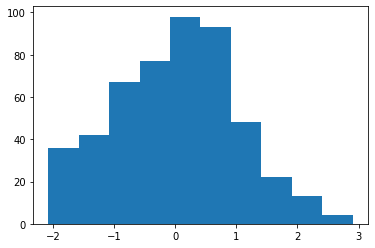

In [30]:
plt.hist(zgroup["Age"])

In [31]:
## Rellenar los datos nulos con el valor promedio
fill_na_mean = lambda x: x.fillna(x.mean())
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,157.0,38.22,33.0,18162.93
1,121.0,82.48,36.0,22089.13
2,153.0,57.68,52.0,15620.60
3,158.0,83.46,10.0,21229.73
4,123.0,135.33,35.0,19584.69
...,...,...,...,...
495,134.0,109.08,45.0,19165.97
496,195.0,146.65,14.0,17848.33
497,154.0,60.72,35.0,18633.65
498,164.0,72.38,21.0,20726.44


## Operaciones básicas

In [32]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,157.0,38.22,33.0,18162.93
1,Male,Rich,121.0,82.48,36.0,22089.13
2,Female,Middle Class,153.0,57.68,52.0,15620.60
3,Female,Rich,158.0,83.46,10.0,21229.73
6,Male,Poor,153.0,47.01,41.0,7463.07
11,Female,Poor,156.0,65.27,43.0,11119.63


In [33]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
461,Female,Poor,184.0,65.45,41.0,13545.74
489,Male,Poor,188.0,68.74,35.0,11479.56
490,Male,Middle Class,170.0,114.64,19.0,15885.25
497,Female,Middle Class,154.0,60.72,35.0,18633.65
498,Male,Rich,164.0,72.38,21.0,20726.44
499,Female,Rich,150.0,46.44,46.0,25392.45


In [34]:
double_group.nth(32)

Height  Weight   Age    Income
Gender Economic Status                                
Female Middle Class      153.0   63.83  14.0  16202.78
       Poor              157.0   59.74  25.0  14083.86
       Rich              124.0   93.18  43.0  21389.77
Male   Middle Class      139.0   84.15   0.0  15716.64
       Poor              171.0   66.23  16.0  13739.72
       Rich              150.0   63.97  32.0  24777.87

In [35]:
data_sorted = data.sort_values(["Age", "Income"])

In [36]:
data_sorted.head()

,Gender,Economic Status,Height,Weight,Age,Income
54,Male,Poor,177.0,127.26,0.0,12036.48
335,Male,Poor,131.0,91.64,0.0,13244.78
111,Male,Middle Class,139.0,84.15,0.0,15716.64
84,Female,Middle Class,143.0,121.64,0.0,17006.78
98,Male,Middle Class,189.0,100.89,0.0,19449.85


In [37]:
age_grouped = data_sorted.groupby("Gender")

In [38]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
54,Male,Poor,177.0,127.26,0.0,12036.48
84,Female,Middle Class,143.0,121.64,0.0,17006.78


In [39]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
244,Female,Middle Class,181.0,103.63,68.0,18454.78
485,Male,Middle Class,173.0,68.60,70.0,17843.23


## Conjunto de entrenamiento y conjunto de testing

In [40]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

## Dividir distribución normal

In [41]:
a = np.random.randn(len(data))

(array([  3.,  19., 130., 438., 818., 957., 640., 257.,  62.,   9.]),
 array([-3.88602121, -3.1452764 , -2.4045316 , -1.66378679, -0.92304198,
        -0.18229717,  0.55844764,  1.29919244,  2.03993725,  2.78068206,
         3.52142687]),
 <a list of 10 Patch objects>)

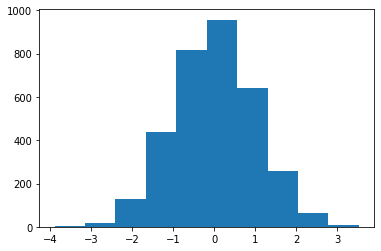

In [42]:
plt.hist(a)

In [43]:
## me quedaré con el 80% de los datos
check = (a < 0.8)

In [44]:
trg = data[check]
tst = data[~check]

In [45]:
len(trg)

2630

In [46]:
len(tst)

703

## Librería sklearn

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
train, test = train_test_split(data, test_size = 0.2)

In [49]:
len(train)

2666

In [50]:
len(test)

667

## Función de shuffle

In [51]:
import sklearn

In [52]:
sklearn.utils.shuffle(data)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
467,MD,112,415,336-5702,no,no,0,170.4,103,28.97,...,71,17.02,258.3,100,11.62,11.6,4,3.13,1,False.
145,MI,140,415,419-9097,no,no,0,231.9,101,39.42,...,94,13.61,110.4,98,4.97,14.3,6,3.86,3,False.
1375,VT,84,415,403-5552,no,yes,42,214.3,112,36.43,...,107,16.00,333.5,117,15.01,11.3,10,3.05,0,False.
801,ME,108,510,402-9558,no,no,0,246.2,102,41.85,...,134,17.20,180.1,95,8.10,9.4,5,2.54,1,False.
1536,AR,95,415,328-2982,no,no,0,69.4,79,11.80,...,109,16.22,219.9,102,9.90,8.9,5,2.40,0,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,PA,112,510,352-9017,no,no,0,217.1,76,36.91,...,100,17.44,185.7,91,8.36,9.4,3,2.54,2,False.
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False.
2703,CT,162,408,363-3763,no,no,0,49.2,121,8.36,...,136,12.23,203.0,97,9.14,12.1,13,3.27,1,False.
948,ID,99,408,354-7025,no,no,0,159.7,83,27.15,...,121,13.21,255.7,114,11.51,8.4,3,2.27,1,False.


In [53]:
cut_id = int(0.75 * len(data))
train_data = data[:cut_id]
test_data = data[cut_id + 1:]

In [54]:
len(train_data)

2499

In [55]:
len(test_data)

833